# Exploratory Data Analysis

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [6]:
# 1. Loading the data
df = pd.read_csv('inpatientCharges.csv')
df.head(), df.info(), df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

(                             DRG Definition  Provider Id  \
 0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
 1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
 2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
 3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
 4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
 
                       Provider Name     Provider Street Address Provider City  \
 0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
 1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
 2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
 3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
 4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   
 
   Provider State  Provider Zip Code Hospital Referral Region Description  \
 0             AL              36301                         

In [7]:
# 2. Data cleaning
df = df.drop_duplicates()
df = df.dropna()
df.head



<bound method NDFrame.head of                                   DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2           

In [8]:
# 3. Summary statistics
print("Numeric summary:")
print(df.describe())
print("\nCategorical value counts:")
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].value_counts())



Numeric summary:
         Provider Id  Provider Zip Code   Total Discharges 
count  163065.000000      163065.000000       163065.000000
mean   255569.865428       47938.121908           42.776304
std    151563.671767       27854.323080           51.104042
min     10001.000000        1040.000000           11.000000
25%    110092.000000       27261.000000           17.000000
50%    250007.000000       44309.000000           27.000000
75%    380075.000000       72901.000000           49.000000
max    670077.000000       99835.000000         3383.000000

Categorical value counts:
DRG Definition DRG Definition
194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYT

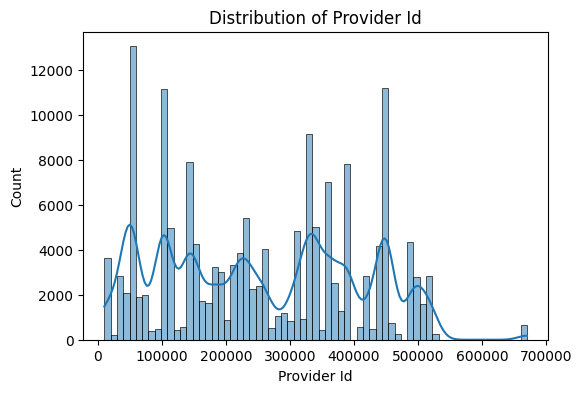

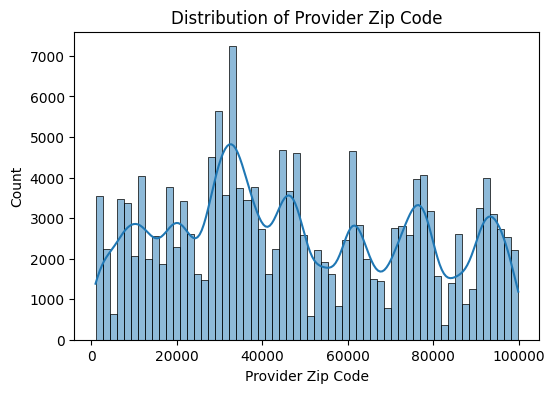

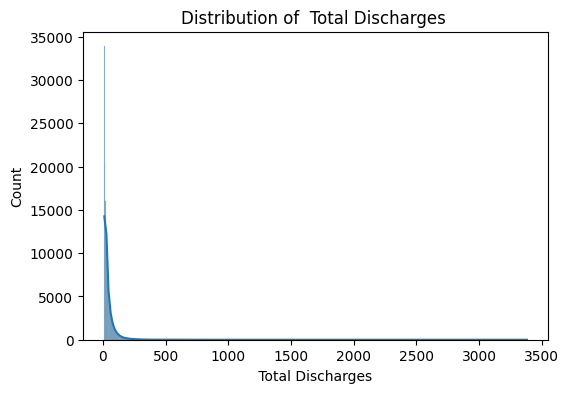

In [9]:
# 4. Distribution plots for key numeric variables
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



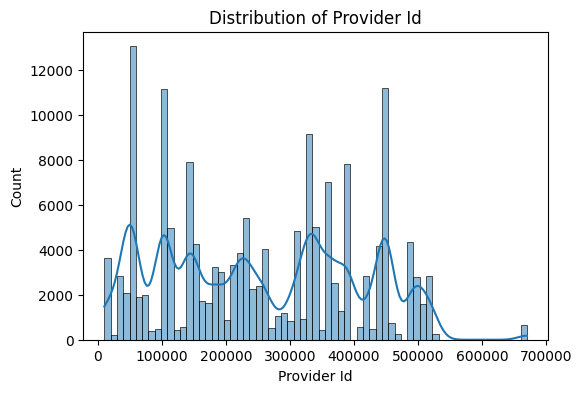

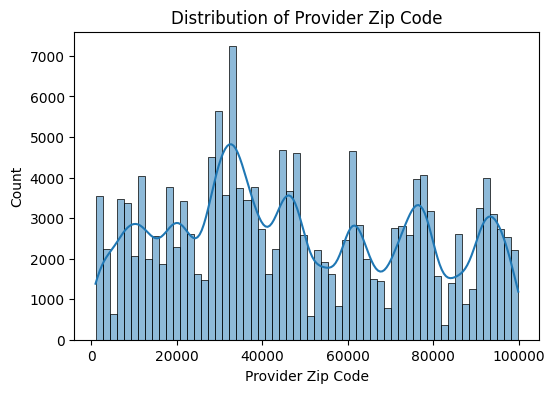

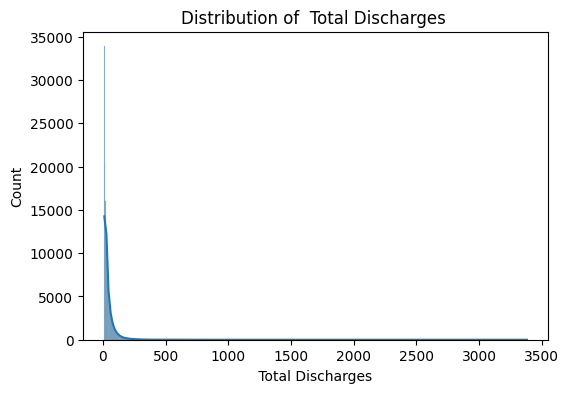

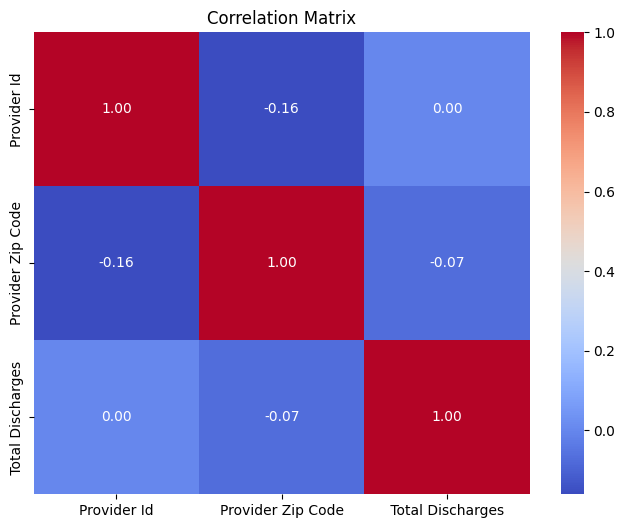

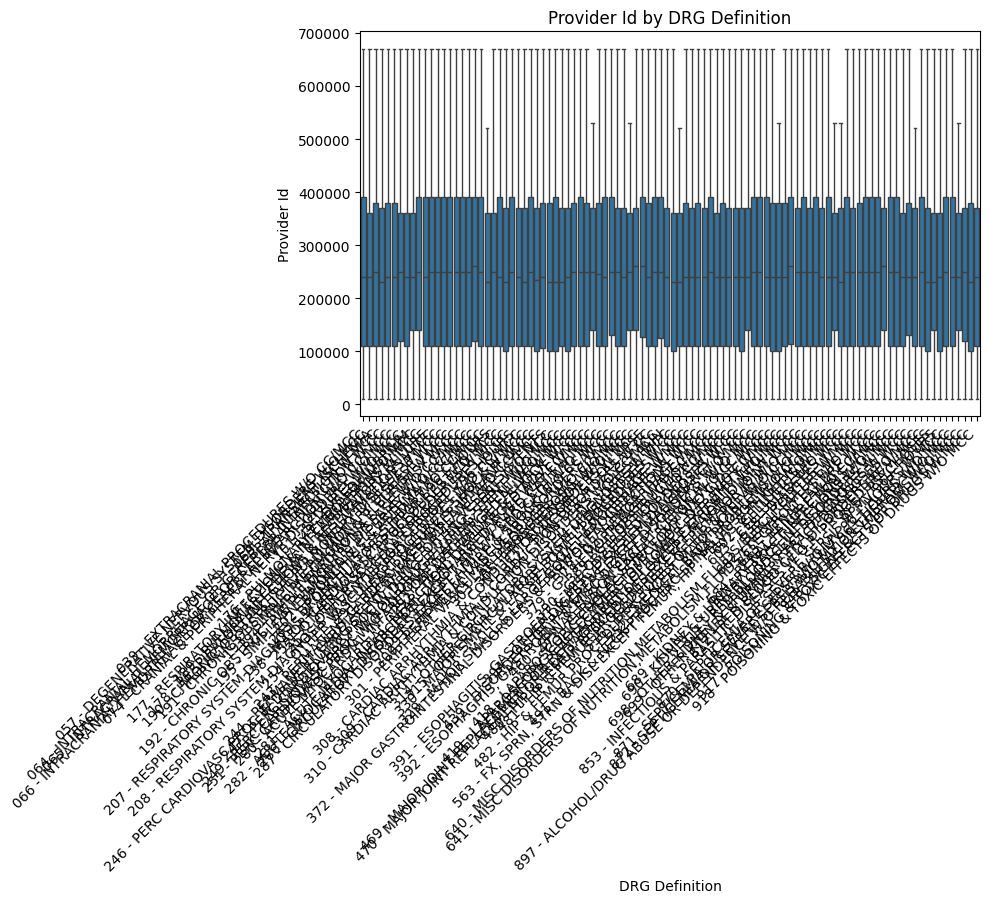


Grouped stats of Provider Id by DRG Definition:
                                                              mean    median  \
DRG Definition                                                                
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC            255892.452271  240088.0   
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O...  251542.131557  240080.0   
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...  249634.776371  230270.0   
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...  253987.634200  240166.0   
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...  254381.700997  240169.5   
...                                                           ...       ...   
885 - PSYCHOSES                                     249210.380098  230151.0   
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHA...  254257.245033  240169.5   
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC      251287.000000  230227.0   
918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC    253519.986252  240069.5   
94

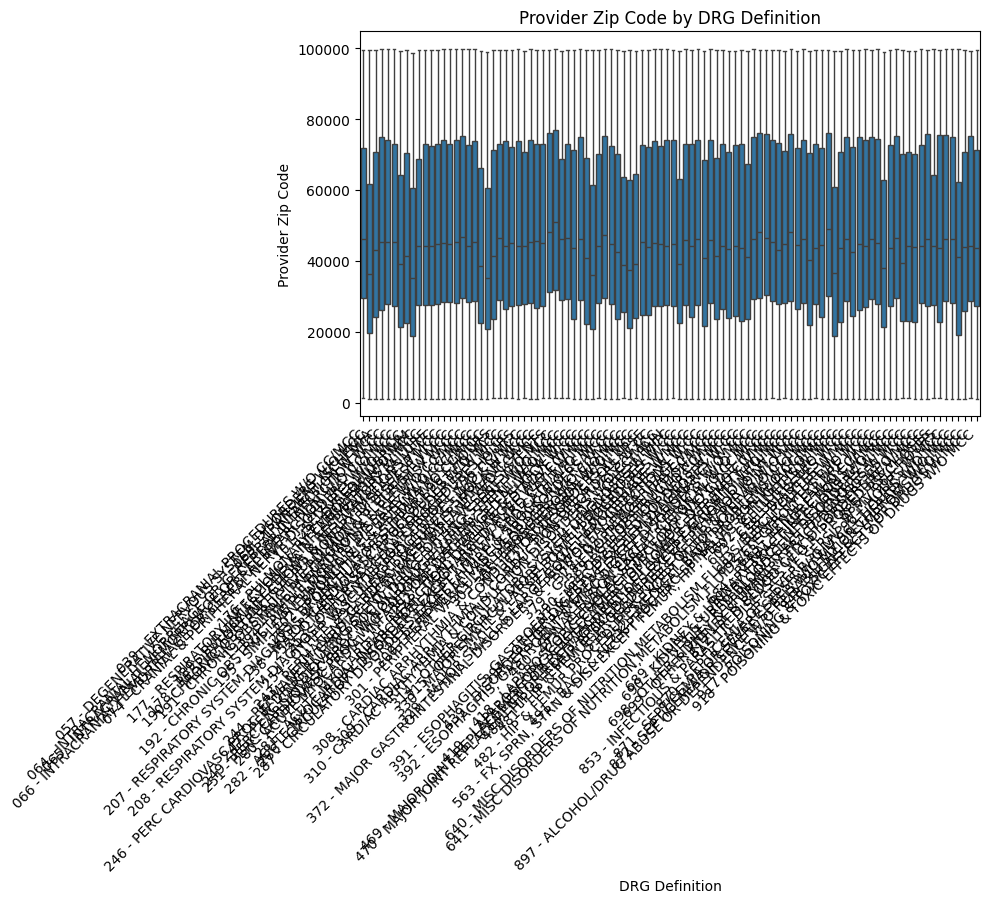


Grouped stats of Provider Zip Code by DRG Definition:
                                                             mean   median  \
DRG Definition                                                              
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC            48911.658017  46311.0   
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O...  42360.266445  36305.0   
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...  48623.722122  45267.0   
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...  48793.583958  45409.0   
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...  48238.061462  45198.0   
...                                                          ...      ...   
885 - PSYCHOSES                                     46881.869494  44077.0   
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHA...  43531.662252  41028.0   
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC      49090.767497  44307.0   
918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC    46972.981187  43657.5   
948 - SIGNS & SYMPTO

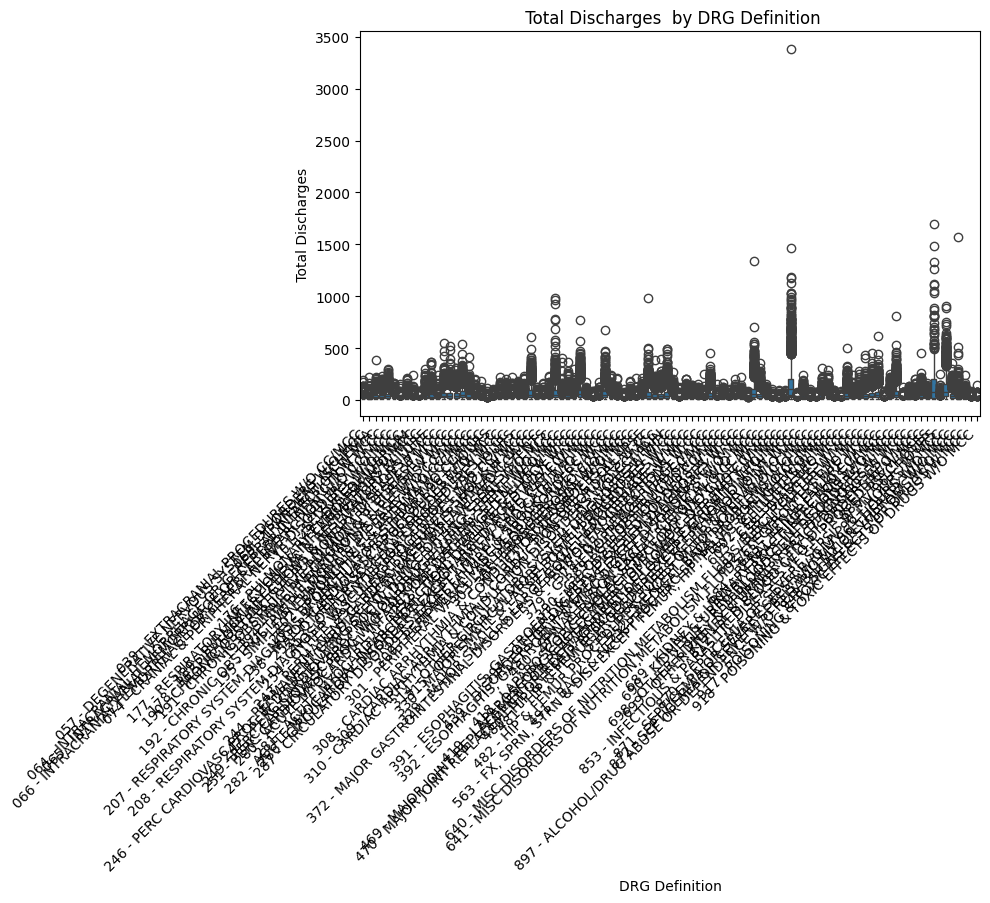


Grouped stats of  Total Discharges  by DRG Definition:
                                                           mean  median  \
DRG Definition                                                           
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             31.145505    23.0   
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O...   25.155704    20.0   
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...   37.427969    28.0   
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...   46.899074    35.0   
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...   30.924142    25.0   
...                                                        ...     ...   
885 - PSYCHOSES                                     146.383361    81.0   
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHA...   35.248344    21.0   
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC       20.109134    17.0   
918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC     21.146889    18.0   
948 - SIGNS & SYMPTOMS W/O MCC                       28

In [10]:
# 4. Distribution plots for key numeric variables
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# 5. Correlation matrix and heatmap
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 6. Group comparisons (e.g. by Diagnosis or Hospital)
categorical_cols = df.select_dtypes(include='object').columns
cat = categorical_cols[0] if len(categorical_cols)>0 else None
if cat:
    for col in numeric_cols:
        plt.figure(figsize=(8,5))
        sns.boxplot(x=cat, y=col, data=df)
        plt.title(f'{col} by {cat}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

        grouped = df.groupby(cat)[col].agg(['mean','median','std'])
        print(f"\nGrouped stats of {col} by {cat}:\n", grouped)

# 7. Optional: Statistical tests

if len(df[cat].unique()) >= 2:
    groups = df[cat].unique()[:2]
    grpA = df[df[cat] == groups[0]][numeric_cols]
    grpB = df[df[cat] == groups[1]][numeric_cols]
    for col in numeric_cols:
        tstat, pval = stats.ttest_ind(grpA[col], grpB[col], equal_var=False)
        print(f"T-test for {col} between {groups[0]} vs {groups[1]}: t={tstat:.2f}, p={pval:.3f}")

# 8. Additional visualization: scatterplots for correlated pairs

threshold = 0.6
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        var1 = numeric_cols[i]; var2 = numeric_cols[j]
        if abs(corr.loc[var1, var2]) > threshold:
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=df[var1], y=df[var2])
            plt.title(f'{var1} vs {var2} (corr = {corr.loc[var1,var2]:.2f})')
            plt.xlabel(var1); plt.ylabel(var2)
            plt.show()
